In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns 

# Importing the data

In [382]:
astronaut_data = pd.read_csv('data/astronaut_data/astronauts.csv')
mission_data = pd.read_csv('data/astronaut_data/missions.csv', parse_dates=['Date'])

In [385]:
mission_data.head()

,Unnamed: 0,ID,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [387]:
astronauts_data.head()

,Unnamed: 0,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,...,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
0,0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,...,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0
1,1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,...,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0
2,2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,...,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0
3,3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,...,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0
4,4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,...,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0


In [18]:
mission_data.head()

,Unnamed: 0,ID,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [153]:
mission_data['Status Mission'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [170]:
missing = mission_data[mission_data[' Cost'].isnull()]['Company Name'].unique()

In [174]:
missing[0]

'SpaceX'

In [175]:
[x for x in mission_data['Company Name'].unique() if x not in missing]

['Northrop',
 'Rocket Lab',
 'Virgin Orbit',
 'Eurockot',
 'Sandia',
 'Kosmotras',
 'EER']

In [183]:
mission_data[mission_data['Company Name'] == 'Eurockot']

,Unnamed: 0,ID,Company Name,Location,Date,Detail,Status Rocket,Cost,Status Mission
250,250,250,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia","Wed Apr 25, 2018 17:57 UTC",Rokot/Briz KM | Sentinel-3B,StatusRetired,41.8,Success
313,313,313,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia","Fri Oct 13, 2017 09:27 UTC",Rokot/Briz KM | Sentinel-5P,StatusRetired,41.8,Success
459,459,459,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia","Tue Feb 16, 2016 17:57 UTC",Rokot/Briz KM | Sentinel-3A,StatusRetired,41.8,Success
723,723,723,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia","Wed Jun 02, 2010 01:59 UTC",Rokot/Briz KM | SERVIS-2,StatusRetired,41.8,Success
746,746,746,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Nov 02, 2009 01:50 UTC",Rokot/Briz KM | SMOS and Proba-2,StatusRetired,41.8,Success
778,778,778,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia","Tue Mar 17, 2009 14:21 UTC",Rokot/Briz KM | GOCE,StatusRetired,41.8,Success
909,909,909,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia","Fri Jul 28, 2006 07:05 UTC",Rokot/Briz KM | KompSat-2,StatusRetired,41.8,Success
944,944,944,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia","Sat Oct 08, 2005 15:02 UTC",Rokot/Briz KM | CryoSat-1,StatusRetired,41.8,Failure
1021,1021,1021,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia","Thu Oct 30, 2003 13:43 UTC",Rokot/Briz KM | SERVIS-1,StatusRetired,41.8,Success
1039,1039,1039,Eurockot,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Jun 30, 2003 14:15 UTC",Rokot/Briz KM | Monitor-E GVM & Others,StatusRetired,41.8,Success


In [185]:
mission_data[mission_data[' Cost'].notnull()][' Cost'].()

array(['50.0', '29.75', '65.0', '145.0', '64.68', '48.5', '90.0', '46.0',
       '28.3', '29.15', '7.5', '30.8', '5.3', '12.0', '112.5', '120.0',
       '153.0', '200.0', '85.0', '115.0', '41.8', '21.0', '31.0', '40.0',
       '164.0', '62.0', '37.0', '350.0', '39.0', '47.0', '35.0', '69.7',
       '109.0', '45.0', '123.0', '130.0', '25.0', '56.5', '15.0', '29.0',
       '80.0', '140.0', '55.0', '59.5', '450.0', '7.0', '20.14', '133.0',
       '190.0', '135.0', '20.0', '136.6', '5,000.0', '1,160.0', '59.0',
       '63.23'], dtype=object)

In [8]:
astronaut_data.shape, mission_data.shape

((1277, 25), (4324, 9))

In [9]:
astronaut_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1277 non-null   int64  
 1   id                        1277 non-null   int64  
 2   number                    1277 non-null   int64  
 3   nationwide_number         1277 non-null   int64  
 4   name                      1277 non-null   object 
 5   original_name             1272 non-null   object 
 6   sex                       1277 non-null   object 
 7   year_of_birth             1277 non-null   int64  
 8   nationality               1277 non-null   object 
 9   military_civilian         1277 non-null   object 
 10  selection                 1272 non-null   object 
 11  year_of_selection         1277 non-null   int64  
 12  mission_number            1277 non-null   int64  
 13  total_number_of_missions  1277 non-null   int64  
 14  occupati

In [34]:
astronauts_data['descend_shuttle'].unique()

array(['Vostok 3', 'Vostok 2', 'MA-6', 'STS-95', 'Mercury-Atlas 7',
       'Soyuz 9', 'Vostok 4', 'Soyuz 14', 'Mercury-Atlas 8', 'Gemini 6A',
       'Apollo 7', 'Mercury-Atlas 9', 'Gemini 5', 'Vostok 5', 'Soyuz 22',
       'Soyuz 29', 'Vostok 6', 'Voskhod 1', 'Soyuz 1', 'Voskhod 2',
       'Soyuz 19', 'Gemini 3', 'Gemini 10', 'Apollo 10', 'Apollo 16',
       'STS-1', 'STS-9', 'Gemini 4', 'Apollo 9', 'Gemini 11', 'Apollo 12',
       'Skylab 2', 'Gemini 7', 'Apollo 8', 'Gemini 12', 'Apollo 13',
       'gemini 6A', 'Gemini 9A', 'ASTP', 'Gemini 8', 'Apollo 11',
       'Apollo 15', 'Apollo 17', 'Soyuz T\xad14', 'Soyuz TM\xad4',
       'Soyuz 39', 'STS-7', 'STS-41-C', 'STS-41-G', 'Soyuz 40', 'STS-2',
       'STS-51-I', 'STS-8', 'STS-3', 'STS-51-F', 'Soyuz T\xad7',
       'Soyuz T-6', 'Soyuz TM-6', 'STS-86', 'STS-4', 'STS-41-D',
       'STS-61-A', 'Soyuz T\xad5', 'Soyuz 3', 'Soyuz 4', 'Soyuz 8',
       'Soyuz 10', 'Soyuz 5', 'Soyuz 21', 'apollo 9', 'Soyuz 6',
       'Soyuz 35', 'Soyuz 7', 'So

In [21]:
mission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   ID              4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Cost           964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


Some comments about the missons dataset:

- Values for cost are largely missing 
- There is very limited information
- Some other useful information to collect could be duration, number of members, mission title 

In [392]:
astronaut_data['decade'] = astronaut_data['year_of_mission'] - astronaut_data['year_of_mission']%10

In [388]:
astronaut_data['age_at_mission'] = astronaut_data['year_of_mission'] - astronaut_data['year_of_birth']

In [344]:
astronaut_data

,Unnamed: 0,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,...,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,decade,age_at_mission
0,0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,...,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.00,0.00,1960,27
1,1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,...,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.00,0.00,1960,26
2,2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,...,MA-6,MA-6,MA-6,5.00,218.00,0,0.00,0.00,1960,41
3,3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,...,STS-95,STS-95,STS-95,213.00,218.00,0,0.00,0.00,1990,77
4,4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,...,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.00,0.00,1960,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,1272,1273,561,345,"McClain, Anne Charlotte","McClain, Anne Charlotte",female,1979,U.S.,military,...,Soyuz MS-11,ISS,Soyuz MS-11,4887.00,4887.00,2,13.13,13.13,2010,39
1273,1273,1274,562,346,"Koch, Christina","Koch, Christina",female,1979,U.S.,civilian,...,Soyuz MS-12,ISS,not completed yet,7372.30,7372.30,4,27.80,27.80,2010,40
1274,1274,1275,563,347,"Morgan, Andrew","Morgan, Andrew",male,1976,U.S.,military,...,Soyuz MS-13,ISS,not completed yet,4303.08,4303.08,6,39.52,39.52,2010,43
1275,1275,1276,564,348,"Meir, Jessica","Meir, Jessica",female,1977,U.S.,civilian,...,Soyuz MS-15,ISS,not completed yet,2697.60,2697.60,1,7.28,7.28,2010,42


# Grouping by Sex

<AxesSubplot:>

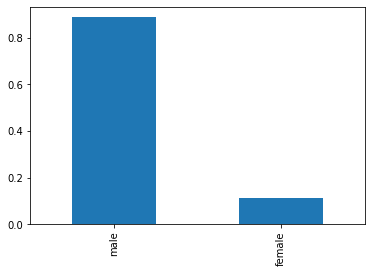

In [44]:
astronaut_data['sex'].value_counts(normalize=True).plot.bar()

<AxesSubplot:xlabel='year_of_mission', ylabel='number'>

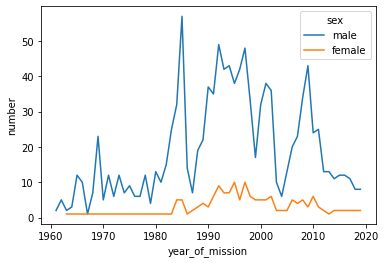

In [64]:
sns.lineplot(x='year_of_mission', y='number', data=counts, hue='sex')

In [70]:
astronaut_data['sex'].value_counts()

male      1134
female     143
Name: sex, dtype: int64

In [356]:
counts = astronaut_data.groupby(by=['decade', 'sex']).nunique()

In [357]:
counts

Unnamed: 0   id  number  nationwide_number  name  \
decade sex                                                        
1960   female           1    1       1                  1     1   
       male            65   65      43                 23    43   
1970   male            79   79      68                 41    68   
1980   female          17   17      12                 12    12   
       male           214  214     138                100   137   
1990   female          68   68      30                 29    30   
       male           384  384     194                157   195   
2000   female          37   37      29                 29    29   
       male           255  255     177                153   178   
2010   female          20   20      20                 19    20   
       male           137  137     102                 89   102   

               original_name  year_of_birth  nationality  military_civilian  \
decade sex                                                                    
1960   female              1              1            1                  1   
       male               43             13            2                  2   
1970   male               67             20            6                  2   
1980   female             12              7            2                  1   
       male              134             28           18                  2   
1990   female             30             15            6                  2   
       male              195             32           14                  2   
2000   female             29             16            4                  2   
       male              178             27           18                  2   
2010   female             20             13            5                  2   
       male              102             27           14                  2   

               selection  ...  mission_title  ascend_shuttle  in_orbit  \
decade sex                ...                                            
1960   female          1  ...              1               1         1   
       male           23  ...             37              36        36   
1970   male           34  ...             38              36        35   
1980   female          9  ...             14              15        13   
       male           66  ...             74              88        65   
1990   female         25  ...             50              50        49   
       male           97  ...            109             111        81   
2000   female         19  ...             29              27        24   
       male           69  ...             84              89        62   
2010   female         15  ...             18              18         6   
       male           43  ...             50              74        13   

               descend_shuttle  hours_mission  total_hrs_sum  field21  \
decade sex                                                              
1960   female                1              1              1        1   
       male                 35             40             42        4   
1970   male                 37             38             58        4   
1980   female               14             15             12        2   
       male                 86             87            124        5   
1990   female               49             52             30        3   
       male                111            153            185        8   
2000   female               29             28             29        6   
       male                 89            111            171        6   
2010   female               17             19             20        5   
       male                 73             87             98        6   

               eva_hrs_mission  total_eva_hrs  age_at_mission  
decade sex                                                     
1960   female                1              1               1  
       mal

In [375]:
counts = counts.groupby('decade').apply(lambda x : x / x.sum())

In [380]:
counts

Unnamed: 0        id    number  nationwide_number      name  \
decade sex                                                                   
1960   female    0.015152  0.015152  0.022727           0.041667  0.022727   
       male      0.984848  0.984848  0.977273           0.958333  0.977273   
1970   male      1.000000  1.000000  1.000000           1.000000  1.000000   
1980   female    0.073593  0.073593  0.080000           0.107143  0.080537   
       male      0.926407  0.926407  0.920000           0.892857  0.919463   
1990   female    0.150442  0.150442  0.133929           0.155914  0.133333   
       male      0.849558  0.849558  0.866071           0.844086  0.866667   
2000   female    0.126712  0.126712  0.140777           0.159341  0.140097   
       male      0.873288  0.873288  0.859223           0.840659  0.859903   
2010   female    0.127389  0.127389  0.163934           0.175926  0.163934   
       male      0.872611  0.872611  0.836066           0.824074  0.836066   

               original_name  year_of_birth  nationality  military_civilian  \
decade sex                                                                    
1960   female       0.022727       0.071429     0.333333           0.333333   
       male         0.977273       0.928571     0.666667           0.666667   
1970   male         1.000000       1.000000     1.000000           1.000000   
1980   female       0.082192       0.200000     0.100000           0.333333   
       male         0.917808       0.800000     0.900000           0.666667   
1990   female       0.133333       0.319149     0.300000           0.500000   
       male         0.866667       0.680851     0.700000           0.500000   
2000   female       0.140097       0.372093     0.181818           0.500000   
       male         0.859903       0.627907     0.818182           0.500000   
2010   female       0.163934       0.325000     0.263158           0.500000   
       male         0.836066       0.675000     0.736842           0.500000   

               selection  ...  mission_title  ascend_shuttle  in_orbit  \
decade sex                ...                                            
1960   female   0.041667  ...       0.026316        0.027027  0.027027   
       male     0.958333  ...       0.973684        0.972973  0.972973   
1970   male     1.000000  ...       1.000000        1.000000  1.000000   
1980   female   0.120000  ...       0.159091        0.145631  0.166667   
       male     0.880000  ...       0.840909        0.854369  0.833333   
1990   female   0.204918  ...       0.314465        0.310559  0.376923   
       male     0.795082  ...       0.685535        0.689441  0.623077   
2000   female   0.215909  ...       0.256637        0.232759  0.279070   
       male     0.784091  ...       0.743363        0.767241  0.720930   
2010   female   0.258621  ...       0.264706        0.195652  0.315789   
       male     0.741379  ...       0.735294        0.804348  0.684211   

               descend_shuttle  hours_mission  total_hrs_sum   field21  \
decade sex                                                               
1960   female         0.027778       0.024390       0.023256  0.200000   
       male           0.972222       0.975610       0.976744  0.800000   
1970   male           1.000000       1.000000       1.000000  1.000000   
1980   female         0.140000       0.147059       0.088235  0.285714   
       male           0.860000       0.852941       0.911765  0.714286   
1990   female         0.306250       0.253659       0.139535  0.272727   
       male           0.693750       0.746341       0.860465  0.727273   
2000   female         0.245763       0.201439       0.145000  0.500000   
       male           0.754237       0.798561       0.855000  0.500000   
2010   female         0.188889       0.179245       0.169492  0.454545   
       male           0.811111       0.820755       0.830508  0.545455   

               eva_hrs_mission  total_eva_hrs 

<AxesSubplot:xlabel='decade'>

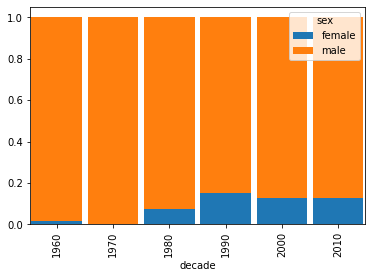

In [293]:
counts['number'].unstack().plot(kind='bar', stacked=True, width=9.0)

In [308]:
astronaut_data.groupby(['decade', 'sex']).nunique()

Unnamed: 0   id  number  nationwide_number  name  \
decade sex                                                        
1960   female           1    1       1                  1     1   
       male            65   65      43                 23    43   
1970   male            79   79      68                 41    68   
1980   female          17   17      12                 12    12   
       male           214  214     138                100   137   
1990   female          68   68      30                 29    30   
       male           384  384     194                157   195   
2000   female          37   37      29                 29    29   
       male           255  255     177                153   178   
2010   female          20   20      20                 19    20   
       male           137  137     102                 89   102   

               original_name  year_of_birth  nationality  military_civilian  \
decade sex                                                                    
1960   female              1              1            1                  1   
       male               43             13            2                  2   
1970   male               67             20            6                  2   
1980   female             12              7            2                  1   
       male              134             28           18                  2   
1990   female             30             15            6                  2   
       male              195             32           14                  2   
2000   female             29             16            4                  2   
       male              178             27           18                  2   
2010   female             20             13            5                  2   
       male              102             27           14                  2   

               selection  ...  year_of_mission  mission_title  ascend_shuttle  \
decade sex                ...                                                   
1960   female          1  ...                1              1               1   
       male           23  ...                9             37              36   
1970   male           34  ...               10             38              36   
1980   female          9  ...                6             14              15   
       male           66  ...               10             74              88   
1990   female         25  ...               10             50              50   
       male           97  ...               10            109             111   
2000   female         19  ...                9             29              27   
       male           69  ...               10             84              89   
2010   female         15  ...                8             18              18   
       male           43  ...               10             50              74   

               in_orbit  descend_shuttle  hours_mission  total_hrs_sum  \
decade sex                                                               
1960   female         1                1              1              1   
       male          36               35             40             42   
1970   male          35               37             38             58   
1980   female        13               14             15             12   
       male          65               86             87            124   
1990   female        49               49             52             30   
       male          81              111            153            185   
2000   female        24               29             28             29   
       male          62               89            111            171   
2010   female         6               17             19             20   
       male          13               73             87             98   

               field21  eva_hrs_mission  total_eva_hrs  
decade sex                               

In [111]:
astronaut_data.groupby(by=['decade'], as_index=False).sum()

,decade,Unnamed: 0,id,number,nationwide_number,year_of_birth,year_of_selection,mission_number,total_number_of_missions,year_of_mission,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
0,1960,3133,3199,1455,737,127377,129490,93,160,129783,7753.880,26422.730,19,35.500,229.85
1,1970,10456,10535,4803,2223,152816,155333,124,170,155973,50709.260,109698.400,50,236.820,286.12
2,1980,65408,65639,32662,15425,448870,456456,370,655,458483,146742.855,458418.935,68,300.500,1257.77
3,1990,277765,278217,119847,61317,882327,897645,990,1607,901422,326972.210,1169262.140,205,1165.927,4696.78
4,2000,277459,277751,114879,56131,572095,582446,639,847,585327,320671.653,1022329.035,287,1819.820,4629.01
5,2010,180505,180662,76550,28586,308815,314227,328,370,316113,489128.990,1004440.740,174,1116.897,2642.79


In [311]:
astronaut_data.sort_values(by= 'total_hrs_sum',ascending=False).drop_duplicates(subset=['name']).head(20)

,Unnamed: 0,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,...,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs,decade
945,945,946,384,89,"Padalka, Gennady",Геннадий Иванович Падалка,male,1958,U.S.S.R/Russia,military,...,43,Soyuz TMA­16M,ISS,Soyuz TMA­16M,4037.00,21083.52,1,5.570,37.95,2010
453,453,454,212,67,"Krikalev, Sergei",Сергей Константинович Крикалёв,male,1958,U.S.S.R/Russia,civilian,...,STS­88,STS­88,STS­88,STS­88,283.00,19281.65,0,0.000,41.43,1990
612,612,613,268,73,"Kaleri, Aleksandr",Александр Юрьевич Калери,male,1956,U.S.S.R/Russia,civilian,...,25,Soyuz TMA­01M,ISS,Soyuz TMA­01M,3824.00,18462.62,0,0.000,23.58,2010
635,635,636,277,74,"Avdeyev, Sergei",Сергей Васильевич Авдеев,male,1956,U.S.S.R/Russia,civilian,...,12,Soyuz TM­15,Mir,Soyuz TM­15,4533.00,17942.23,4,18.350,41.00,1990
744,744,745,311,78,"Malenchenko, Yuri",Юрий Иванович Маленченко,male,1961,U.S.S.R/Russia,military,...,32,Soyuz TMA­05M,ISS,Soyuz TMA­05M,3047.00,16872.47,1,5.850,34.83,2010
447,447,448,210,66,"Polyakov, Valeri",Валерий Владимирович Поляков,male,1942,U.S.S.R/Russia,civilian,...,3,Soyuz TM­6,Mir,Soyuz TM­7,5782.00,16288.53,0,0.000,0.00,1980
1044,1044,1045,426,98,"Yurchikhin, Fyodor",Фёдор Николаевич Юрчихин,male,1959,U.S.S.R/Russia,civilian,...,36,Soyuz TMA­09M,ISS,Soyuz TMA­09M,3990.00,16147.00,2,20.030,59.43,2010
1138,1138,1139,476,102,"Kononenko, Oleg D.",Олег Дмитриевич Кононенко,male,1964,U.S.S.R/Russia,military,...,57,Soyuz MS-11,ISS,Soyuz MS-11,4887.00,16081.00,2,13.750,32.20,2010
1031,1031,1032,422,267,"Whitson, Peggy A.","Whitson, Peggy A.",female,1960,U.S.,civilian,...,5,STS-111,ISS,STS-113,4438.00,15982.00,1,4.380,60.31,2000
445,445,446,208,65,"Solovyev, Anatoly",Анатолий Яковлевич Соловьёв,male,1948,U.S.S.R/Russia,military,...,24,Soyuz TM­26,Mir,Soyuz TM­26,4745.00,15624.03,7,89.130,78.80,1990


In [315]:
astronaut_data[['mission_title' ,'nationality']].groupby(by='mission_title', as_index=False).nunique().max()

mission_title    ЭП-1
nationality         5
dtype: object

In [122]:
missions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   decade                    6 non-null      int64
 1   Unnamed: 0                6 non-null      int64
 2   id                        6 non-null      int64
 3   number                    6 non-null      int64
 4   nationwide_number         6 non-null      int64
 5   name                      6 non-null      int64
 6   original_name             6 non-null      int64
 7   sex                       6 non-null      int64
 8   year_of_birth             6 non-null      int64
 9   nationality               6 non-null      int64
 10  military_civilian         6 non-null      int64
 11  selection                 6 non-null      int64
 12  year_of_selection         6 non-null      int64
 13  mission_number            6 non-null      int64
 14  total_number_of_missions  6 non-null      int6

# Findings 

## Facts and Figures
- total hours in space 
- proportion of female astronauts increasing 
- oldest youngest

In [316]:
#Total Hours in Space

astronaut_data[['hours_mission']].sum() #153 years 

hours_mission    1341978.848
dtype: float64

In [317]:
astronaut_data['sex'].value_counts(normalize=True)

male      0.888019
female    0.111981
Name: sex, dtype: float64

Females represent only 11% of the dataset

In [338]:
ratio_sex = astronaut_data.groupby(by=['decade', 'sex']).nunique()['number']

ratio_sex = ratio_sex.groupby('decade').apply(lambda x  : x *100/ x.sum()).unstack()

<AxesSubplot:xlabel='decade'>

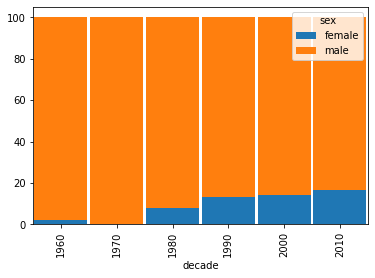

In [342]:
ratio_sex.plot(kind='bar', stacked=True, width=9.5)

In [390]:
ratio_sex

sex,female,male
decade,,
1960,2.272727,97.727273
1970,NaN,100.000000
1980,8.000000,92.000000
1990,13.392857,86.607143
2000,14.077670,85.922330
2010,16.393443,83.606557


In [354]:
#oldest 

astronaut_data[['name','age_at_mission']].nlargest(3, 'age_at_mission')

,name,age_at_mission
3,"Glenn, John H., Jr.",77
230,"Musgrave, Franklin Story",61
998,"Tito, Dennis Anthony",61


In [389]:
#Youngest

astronaut_data[['name','age_at_mission', 'year_of_mission']].nsmallest(3, 'age_at_mission')

,name,age_at_mission,year_of_mission
1,"Titov, Gherman",26,1961
17,"Tereshkova, Valentina",26,1963
0,"Gagarin, Yuri",27,1961


## Number of missions since the cold war has gone down, however hours spent in space have stayed constant

Number of missions > Countries > Cold War 

Text(1980.0, 60, 'Cold War')

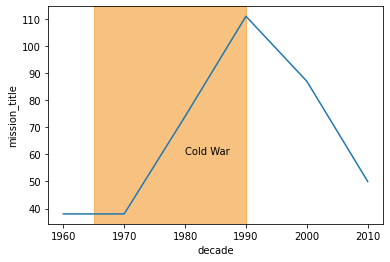

In [393]:
missions= astronaut_data.groupby(by=['decade'], as_index=False).nunique()

sns.lineplot(x='decade', y='mission_title', data=missions)
# missions.plot(x='decade', y='mission_title')
# locs, labels = plt.xticks()
# plt.xticks(locs, ['1950','1960','1970','1980', '1990', '2000','2010','2020'])
# plt.xticks()
plt.axvspan(1965, 1990, alpha = 0.5, color = '#F08700')
plt.text(x = 1980.0, y = 60, s = 'Cold War')

## Missions by company/ proportion of success

In [309]:
#group by mission title and aggregate hours

In [403]:
# fig, ax = plt.subplots(figsize=(9,5))

# #ax.flatten()
# sns.lineplot(data=num_missions_decade, lw=2, color='royalblue')
# # ax.set_xlabel('Year', size=12)
# # ax.set_ylabel('Number of missions', size=12)
# #ax.set_title('Missions each year')


# sns.lineplot(data=avg_mission_hours_decade['hours_mission']/100, lw=2, color='firebrick')
# #ax.set_title('Hours/Mission')
# # ax.set_xlabel('Year', size=12)
# # ax.set_ylabel('')
# plt.suptitle('Astronauts are spending more hours per mission than ever before', fontsize=15)
# plt.show()